In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection And Procesing

In [15]:
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [16]:
car_dataset.shape

(4340, 8)

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [17]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [18]:
#checking the distribustion of categorial data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding The categorical Data

In [42]:
# encoding "fuel " column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1, 'CNG':2 }},inplace=True)

# encoding "seller_type  " column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1 }},inplace=True)

# encoding "transmission " column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1, }},inplace=True)


In [50]:
 car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner


In [81]:
car_dataset.replace({
    'fuel': {
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2,
        'LPG': 3,
        'Electric': 4
    },
    'seller_type': {          # ← perhatikan nama kolom benar
        'Individual': 0,
        'Dealer': 1,
        'Trustmark Dealer': 2
    },
    'owner': {
        'First Owner': 1,
        'Second Owner': 2,
        'Third Owner': 3,
        'Fourth & Above Owner': 4,
        'Test Drive Car': 0
    }
}, inplace=True)


/tmp/ipython-input-701158001.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [82]:
car_dataset.select_dtypes(include='object').head()


,name
0,Maruti 800 AC
1,Maruti Wagon R LXI Minor
2,Hyundai Verna 1.6 SX
3,Datsun RediGO T Option
4,Honda Amaze VX i-DTEC


In [83]:
X = car_dataset.drop(['name','selling_price'], axis=1)
Y = car_dataset['selling_price']


In [84]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      1
1     2007      50000     0            0             0      1
2     2012     100000     1            0             0      1
3     2017      46000     0            0             0      1
4     2014     141000     1            0             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      2
4336  2014      80000     1            0             0      2
4337  2009      83000     0            0             0      2
4338  2016      90000     1            0             0      1
4339  2016      40000     0            0             0      1

[4340 rows x 6 columns]


In [85]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Spliting Data ANd targe


In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.2,random_state=2)

Model Training

1.   Linear Regresion


In [89]:
lin_reg_model = LinearRegression()

In [90]:
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

Model Evaluation

In [91]:
# Predict On Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [92]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Score :",error_score)

R squared Score : 0.4444356273955913


Visualize the Actual prices And Predicted prices


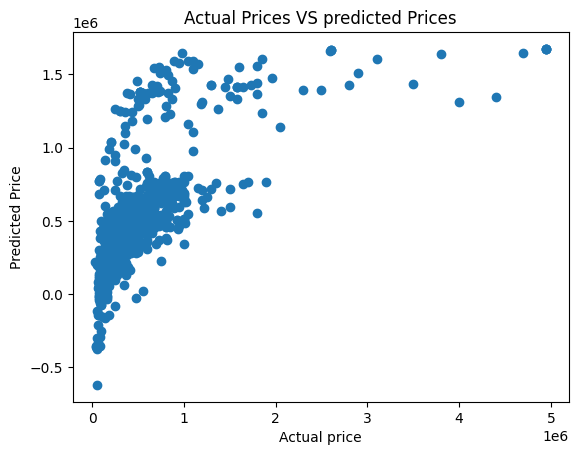

In [99]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS predicted Prices")
plt.show()

In [107]:
test_data_prediction = lin_reg_model.predict(X_test)


In [108]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.43843253689959816


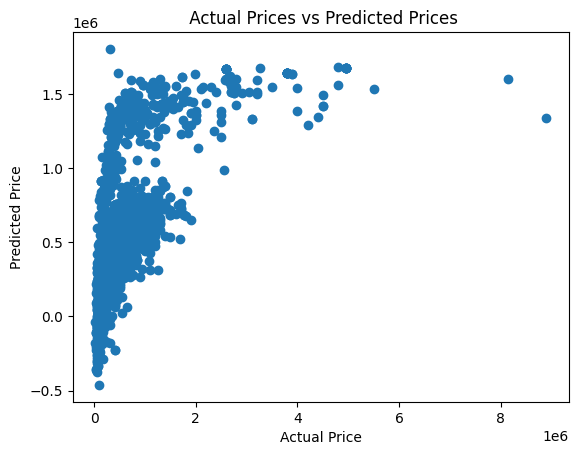

In [110]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [111]:
# loading the linear regression model
lass_reg_model = Lasso()

In [112]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [113]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [114]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.44443562734688513


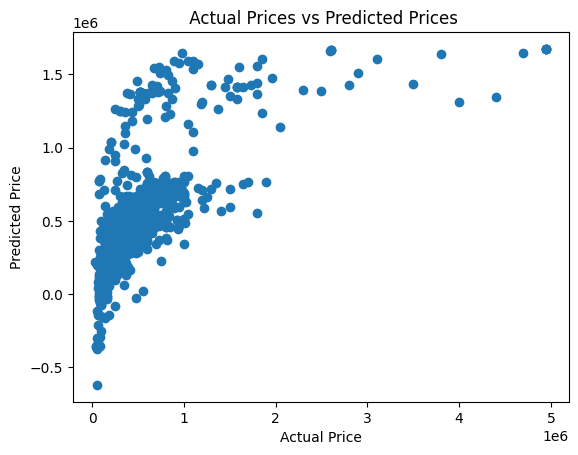

In [115]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [116]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)